# Linear Regression

This morning's warmup will more of a codealong.

Since we're nearing the end of mod project, let's make sure we have the code down for fitting a linear regression model!

Below we import life expectancy data for 193 countries from 2000-2015.

In [62]:
import pandas as pd

df = pd.read_csv('https://gist.githubusercontent.com/joelsewhere/a61e90c0d88cddb052975d65835bc339/raw/20743a0ea41fae58dbee2f166e5d0af56a5f4242/life_expectancy.csv')

For this warmup, let's:
- Limit the dataset to the year 2015
- Remove all columns containing strings
- Lower the column names and replace spaces with underscores

In [63]:
df = df[df.Year == 2015]
df = df.select_dtypes(exclude=['object'])
df.columns = [x.lower().strip().replace(' ', '_') for x in df.columns]

Great, let's make sure we don't have any null values!

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 0 to 2922
Data columns (total 20 columns):
year                               183 non-null int64
life_expectancy                    183 non-null float64
adult_mortality                    183 non-null float64
infant_deaths                      183 non-null int64
alcohol                            6 non-null float64
percentage_expenditure             183 non-null float64
hepatitis_b                        174 non-null float64
measles                            183 non-null int64
bmi                                181 non-null float64
under-five_deaths                  183 non-null int64
polio                              183 non-null float64
total_expenditure                  2 non-null float64
diphtheria                         183 non-null float64
hiv/aids                           183 non-null float64
gdp                                154 non-null float64
population                         142 non-null float64
thinness__

# $Yikes$

Ok, let's first drop the ```alcohol``` and ```total_expenditure``` columns.

Once we've done that we can drop any other rows that have null values. 

We will also drop the ```year``` column for now.

In [65]:
df.drop(['alcohol', 'total_expenditure', 'year'], axis = 1, inplace = True)
df.dropna(inplace=True)

Next we need to isolate the X and y data.

For this dataset, the column ```life_expectancy``` is the target column *(y column)*

In [66]:
X = df.drop('life_expectancy', axis=1)
y = df['life_expectancy']

Ok, now in the cell below import ```statsmodels.api as sm```.

In [67]:
import statsmodels.api as sm

And then we fit our model!

In [100]:
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        life_expectancy   R-squared (uncentered):                   0.993
Model:                            OLS   Adj. R-squared (uncentered):              0.992
Method:                 Least Squares   F-statistic:                              999.2
Date:                Thu, 11 Jun 2020   Prob (F-statistic):                   1.68e-114
Time:                        01:21:40   Log-Likelihood:                         -417.18
No. Observations:                 130   AIC:                                      866.4
Df Residuals:                     114   BIC:                                      912.2
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
adult_mortality                     0.0128      0.008      1.643      0.103      -0.003       0.028
infant_deaths                      -0.0887      0.076     -1.162      0.248      -0.240       0.062
percentage_expenditure              0.0069      0.017      0.394      0.694      -0.028       0.041
hepatitis_b                         0.0489      0.054      0.912      0.363      -0.057       0.155
measles                           4.99e-05      0.000      0.369      0.713      -0.000       0.000
bmi                                 0.0029      0.037      0.080      0.936      -0.070       0.076
under-five_deaths                   0.0568      0.055      1.036      0.302      -0.052       0.165
polio                               0.0411      0.030      1.371      0.173      -0.018       0.100
diphtheria                          0.0151      0.062      0.243      0.808      -0.108       0.138
hiv/aids                            0.3207      0.524      0.612      0.541      -0.717       1.358
gdp                                -0.0002    6.7e-05     -2.871      0.005      -0.000   -5.97e-05
population                       4.223e-09   2.27e-08      0.186      0.853   -4.07e-08    4.92e-08
thinness__1-19_years                0.3341      0.553      0.604      0.547      -0.762       1.430
thinness_5-9_years                  0.4688      0.540      0.868      0.387      -0.601       1.539
income_composition_of_resources    78.5533     10.841      7.246      0.000      57.076     100.030
schooling                           0.2954      0.566      0.522      0.602      -0.825       1.416
==============================================================================
Omnibus:                        2.667   Durbin-Watson:                   2.107
Prob(Omnibus):                  0.264   Jarque-Bera (JB):                2.468
Skew:                           0.337   Prob(JB):                        0.291
Kurtosis:                       2.985   Cond. No.                     6.24e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.24e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**How well is our model explaining the variance of our data?**

99% of the variation for the life expectancy column is explained by this model, however this current model produces p-values > 0.05 for several independent variables which inidicates that there is insufficient evidence to conclude these variables have a non zero correlation with the dependent variable.

**Before we go, let's fit an sklearn model as well.**

In [75]:
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics

First we create a model object.

In [74]:
lr = LinearRegression()

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Then we fit the model object on our X, and y data.

In [ ]:
lr.fit(X, y)

Next we use the model to predict values for our X data.

In [101]:
y_hat = lr.predict(X)

Then we compare our predictions to the actual y values

In [103]:
metrics.r2_score(y, y_hat)

0.9008630576092219

Now let's plot our coefficients!

In [110]:
def plot_coefficients(column_names, coefficients):
    plt.figure(figsize=(15,8))
    zipped = list(zip(column_names,coefficients))
    zipped = sorted(zipped, key= lambda x: x[1])
    
    xaxis = [x[0] for x in zipped]
    yaxis = [x[1] for x in zipped]
    
    plt.bar(xaxis, yaxis)
    plt.xticks(rotation=60)
    plt.title('Coefficients')

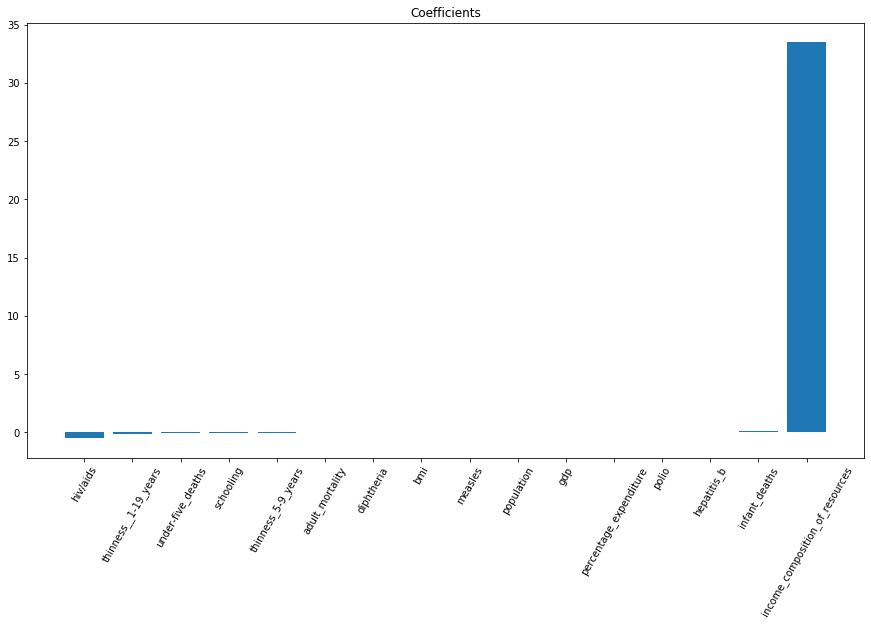

In [111]:
plot_coefficients(X.columns, lr.coef_)

This sklearn model explains 90% of the variance for the dependant variable. There are some major differences between the coefficients. It might be beneficial to scale our data using Sklearn's Standard Scaler.

In [142]:
from sklearn import preprocessing

In [153]:
scaler = preprocessing.StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns = X.columns)
y.reset_index(drop=True, inplace=True)

To speed things up, let's compile out modeling code into functions

In [157]:
def OLS(X, y, constant=False):
    if constant:
        return sm.OLS(y, sm.add_constant(X)).fit()
    # Flipping the order for X and y so they are consistent across models
    return sm.OLS(y, X).fit()

def linear_regression(X,y):
    lr = LinearRegression()
    lr.fit(X, y)
    y_hat = lr.predict(X)
    r_squared = metrics.r2_score(y, y_hat)
    print("R^2:", r_squared)
    plot_coefficients(X.columns, lr.coef_)
    return lr

In [158]:
OLS(X_scaled, y, constant=True).summary()

/Users/joel/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        life_expectancy   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     64.18
Date:                Thu, 11 Jun 2020   Prob (F-statistic):           5.55e-49
Time:                        08:39:59   Log-Likelihood:                -304.01
No. Observations:                 130   AIC:                             642.0
Df Residuals:                     113   BIC:                             690.8
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              70.7415      0.236    299.795      0.000      70.274      71.209
adult_mortality                    -2.0701      0.356     -5.808      0.000      -2.776      -1.364
infant_deaths                       6.3413      3.150      2.013      0.046       0.101      12.582
percentage_expenditure              0.1739      0.238      0.732      0.466      -0.297       0.644
hepatitis_b                         1.0605      0.561      1.890      0.061      -0.051       2.172
measles                            -0.4720      0.519     -0.909      0.365      -1.501       0.557
bmi                                -0.2005      0.326     -0.614      0.540      -0.847       0.446
under-five_deaths                  -5.8947      2.900     -2.032      0.044     -11.641      -0.148
polio                               0.2964      0.321      0.924      0.357      -0.339       0.932
diphtheria                         -0.2469      0.608     -0.406      0.685      -1.451       0.957
hiv/aids                           -0.7245      0.338     -2.146      0.034      -1.393      -0.056
gdp                                 0.0852      0.297      0.287      0.775      -0.503       0.673
population                         -0.0292      0.287     -0.102      0.919      -0.598       0.539
thinness__1-19_years               -0.5200      1.019     -0.510      0.611      -2.539       1.499
thinness_5-9_years                 -0.1064      1.018     -0.105      0.917      -2.123       1.910
income_composition_of_resources     5.0418      0.747      6.746      0.000       3.561       6.522
schooling                          -0.1094      0.655     -0.167      0.868      -1.408       1.189
==============================================================================
Omnibus:                        3.474   Durbin-Watson:                   2.110
Prob(Omnibus):                  0.176   Jarque-Bera (JB):                3.538
Skew:                          -0.153   Prob(JB):                        0.171
Kurtosis:                       3.748   Cond. No.                         41.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R^2: 0.9008630576092219


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

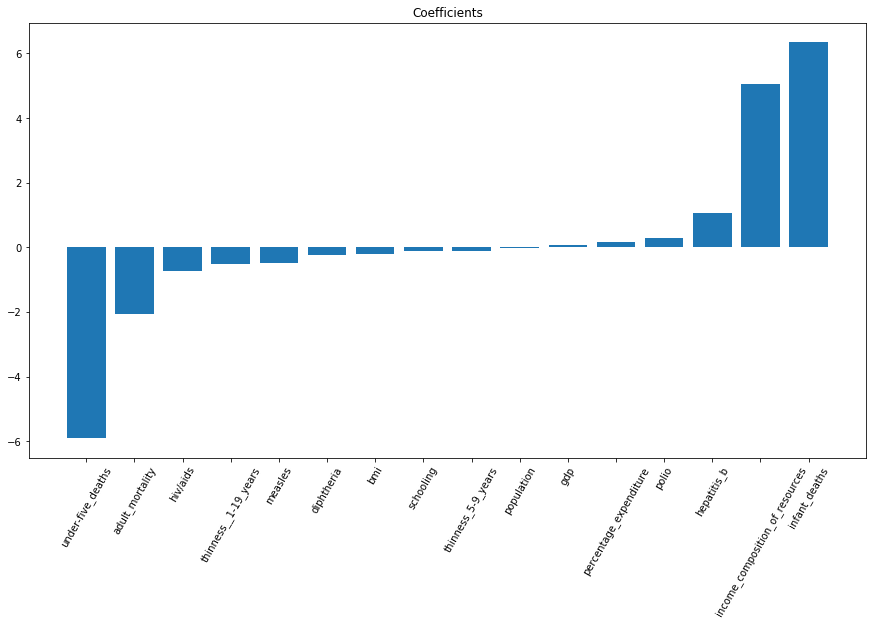

In [156]:
linear_regression(X_scaled, y)

Income composition of resources has a very strong relationship with out target variable. 

Let's plot the relationship between those two columns, and then run a model without the Income composition.

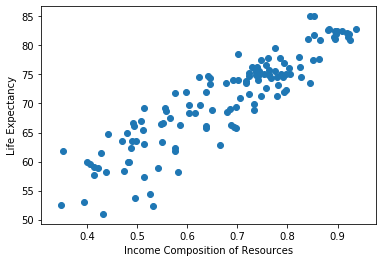

In [159]:
plt.scatter(df.income_composition_of_resources, df.life_expectancy)
plt.ylabel('Life Expectancy')
plt.xlabel('Income Composition of Resources');

That is as close to a linear relationship as you could hope for. Let's see how our model does without this variable.

In [160]:
X_scaled.drop('income_composition_of_resources', axis = 1, inplace = True)

R^2: 0.8609382489399316


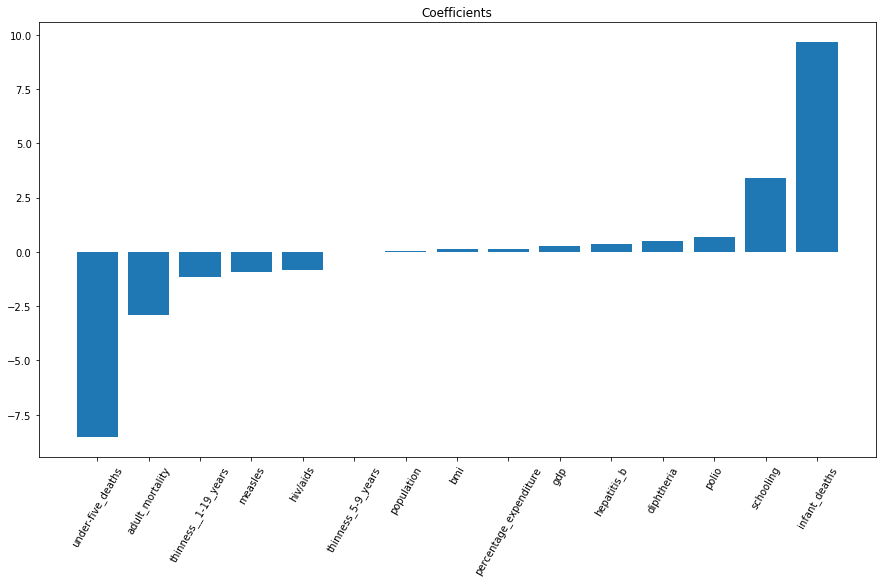

In [161]:
linear_regression(X_scaled, y);

In [163]:
OLS(X_scaled, y, constant=True).summary()

/Users/joel/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        life_expectancy   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     47.05
Date:                Thu, 11 Jun 2020   Prob (F-statistic):           1.17e-41
Time:                        08:43:35   Log-Likelihood:                -326.01
No. Observations:                 130   AIC:                             684.0
Df Residuals:                     114   BIC:                             729.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     70.7415      0.278    254.245      0.000      70.190      71.293
adult_mortality           -2.8890      0.395     -7.311      0.000      -3.672      -2.106
infant_deaths              9.6596      3.668      2.633      0.010       2.392      16.927
percentage_expenditure     0.1418      0.280      0.506      0.614      -0.413       0.697
hepatitis_b                0.3510      0.650      0.540      0.590      -0.936       1.638
measles                   -0.9300      0.607     -1.532      0.128      -2.133       0.273
bmi                        0.1295      0.381      0.340      0.734      -0.624       0.883
under-five_deaths         -8.5453      3.389     -2.522      0.013     -15.258      -1.833
polio                      0.6764      0.372      1.816      0.072      -0.061       1.414
diphtheria                 0.4926      0.705      0.699      0.486      -0.904       1.889
hiv/aids                  -0.8123      0.398     -2.042      0.043      -1.600      -0.024
gdp                        0.2515      0.349      0.721      0.472      -0.440       0.942
population                 0.0616      0.338      0.182      0.856      -0.608       0.731
thinness__1-19_years      -1.1334      1.197     -0.947      0.346      -3.504       1.237
thinness_5-9_years         0.0121      1.200      0.010      0.992      -2.365       2.389
schooling                  3.4106      0.467      7.298      0.000       2.485       4.336
==============================================================================
Omnibus:                        0.441   Durbin-Watson:                   1.891
Prob(Omnibus):                  0.802   Jarque-Bera (JB):                0.320
Skew:                          -0.122   Prob(JB):                        0.852
Kurtosis:                       3.004   Cond. No.                         39.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

There are some somewhat non intitutive relationships being described by this model, and there are still many dependant variablers with p-values greater than 0.05. The main purpose of this warmup was to look at basic code for Linear Regression, but the assumptions of Linear Regression must be checked for a project such as this to be valid. Before moving any further, these questions should answered.

- Are the relationships between dependant variables and the independant variable Linear? 
- Are the residuals homoskedastic?
- Are the dependant features correlated with each other?
- Is there auto-correlation?